# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from modelsummary import summary
# from tqdm.notebook import tqdm
from tqdm import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [2]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [3]:
df = pd.read_csv('data.txt.zip', header= None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

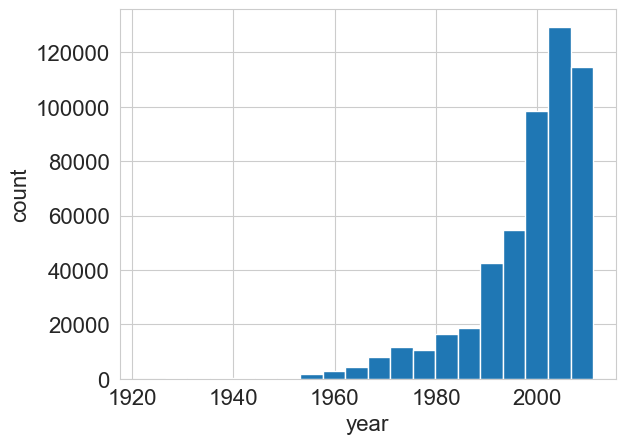

Range: 1922 - 2011
Unique values: 89


In [5]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
const_pred = np.full(len(y_test), (y_train).mean()) # константный прогноз

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(f'MSE константного прогноза: {mean_squared_error(y_test, const_pred)}\nMSE прогноза Ridge: {mean_squared_error(y_test, ridge_pred)}')

MSE константного прогноза: 117.62580230734426
MSE прогноза Ridge: 89.74966397222076


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [9]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, device, verbose=True):
    '''
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''

    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            '''
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            '''
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            loss.backward()
            optimizer.step()

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader
        
        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                '''
                YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
                Do evaluation
                predictions = ...
                loss = ...
                '''
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
            
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)

                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)
    
    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [10]:
# train data
tensor_X_train = torch.from_numpy(X_train).float() # перевожу numpy массив в torch tensor с float32
tensor_Y_train = torch.from_numpy(y_train - y_train.min()) # + преобразую таргет к значениям от 0 до С

train_tensor_dataset = TensorDataset(
    tensor_X_train,
    tensor_Y_train
    )

train_loader = DataLoader(train_tensor_dataset, batch_size= 64, shuffle= True, num_workers= 4, drop_last= True)

# validate data
tensor_X_val = torch.from_numpy(X_val).float() # перевожу numpy массив в torch tensor с float32
tensor_Y_val = torch.from_numpy(y_val - y_train.min())

val_tensor_dataset = TensorDataset(
    tensor_X_val,
    tensor_Y_val
    )

val_loader = DataLoader(val_tensor_dataset, batch_size= 64, shuffle= False, num_workers= 4, drop_last= True)

In [11]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
num_classes = len(np.unique(tensor_Y_train)) + 1

class Net(nn.Module):
    def __init__(self, num_classes= num_classes, num_hidden= 128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(90, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_classes)
        )

    def forward(self, x):
        return self.net(x)
    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()
metric = lambda y_pred, y_true: torch.mean((torch.argmax(y_pred, dim= 1).float() - y_true) ** 2)

summary(net, torch.zeros([1, 90]))

-----------------------------------------------------------------------
             Layer (type)                Input Shape         Param #
                 Linear-1                   [-1, 90]          11,648
                   ReLU-2                  [-1, 128]               0
                 Linear-3                  [-1, 128]          11,610
Total params: 23,258
Trainable params: 23,258
Non-trainable params: 0
-----------------------------------------------------------------------


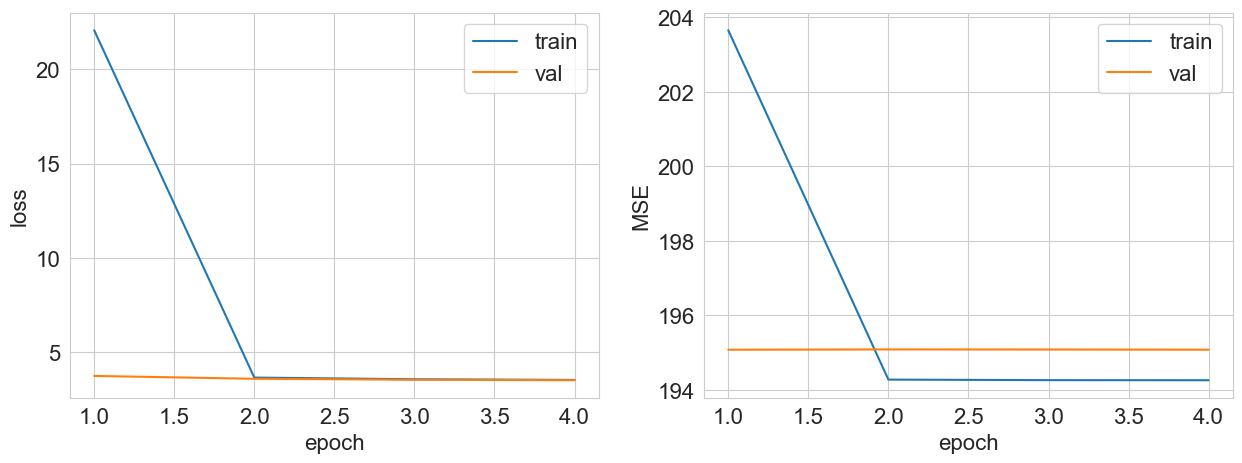

Validation MSE: 195.077


(194.25717104604993, 195.07650035704307)

In [12]:
train_and_validate(net, optimizer, criterion, metric, train_loader, val_loader, 4, device, verbose= True)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Бейзлайн не удалось побить, в нашем случае лучше будет обучаться на год как на непрерывную величину и округлять ее потом до целого значения, потому что во-первых, классов получается слишком много, во-вторых таргет имеет некоторые свойства непрерывной величины (например, 2000 год меньше 2001 года)

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

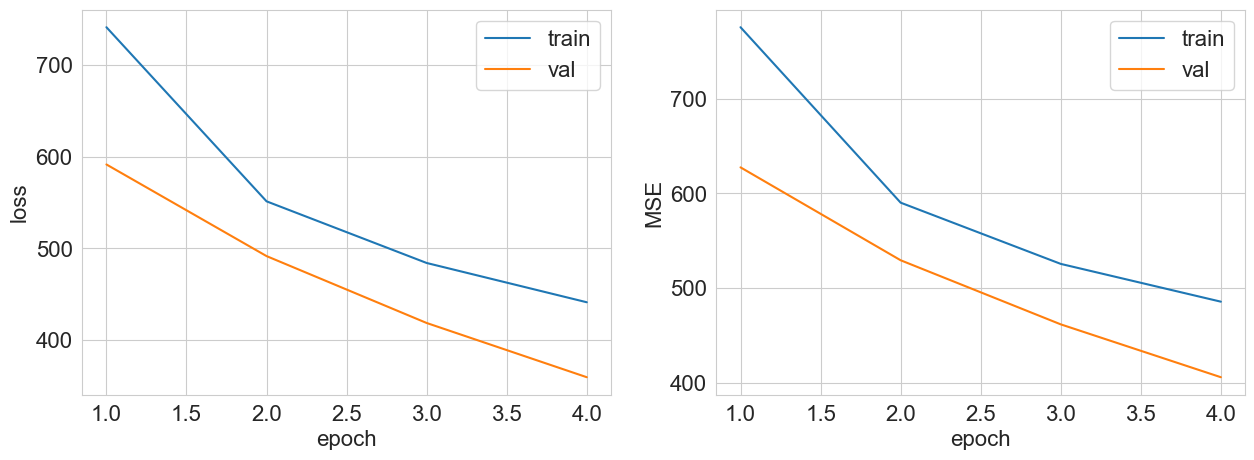

Validation MSE: 405.808


(485.64489591000813, 405.8084648110453)

In [13]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
# train data
tensor_X_train = torch.from_numpy(X_train).float() # перевожу numpy массив в torch tensor с float32
tensor_Y_train = torch.from_numpy(y_train - y_train.min()).float()

train_tensor_dataset = TensorDataset(
    tensor_X_train,
    tensor_Y_train.reshape(-1, 1)
    )

train_loader = DataLoader(train_tensor_dataset, batch_size= 64, shuffle=True, num_workers= 4, drop_last= True)

# validate data
tensor_X_val = torch.from_numpy(X_val).float()
tensor_Y_val = torch.from_numpy(y_val - y_train.min()).float()

val_tensor_dataset = TensorDataset(
    tensor_X_val,
    tensor_Y_val.reshape(-1, 1)
    )

val_loader = DataLoader(val_tensor_dataset, batch_size= 64, shuffle= False, num_workers= 4, drop_last= True)


class Net(nn.Module):
    def __init__(self, num_hidden= 128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(90, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, 1)
        )

    def forward(self, x):
        return self.net(x)

net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-7)
criterion = nn.MSELoss()
metric = lambda y_pred, y_true: torch.mean((y_pred[:, 0] - y_true) ** 2)

train_and_validate(net, optimizer, criterion, metric, train_loader, val_loader, 4, device, verbose=True)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** судя по графику значения функции потерь, имеется тренд на снижение, но достичь приемлемых значений функции потерь при имеющихся параметрах не удалось, какие бы значения lr не определялись. Так происходит, потому что целевая переменная имееет экспоненциальное распределение, модель проста, возможно стоит ее несколько усложнить, с увеличением числа эпох. Еще стоит попробовать различные оптимизиторы, возможно применение более сложных оптимизаторов даст существенное улучшение метрик. 

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [14]:
def normalize(sample):
    '''
    Min-max normalization to convert sample to [0, 1] range
    '''
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    return (sample - sample.min()) / (sample.max() - sample.min())

def denormalize(sample, min_origin_val, max_origin_val):
    '''
    Denormalize sample from [0, 1] to initial range
    '''
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    return sample * (max_origin_val - min_origin_val) + min_origin_val

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

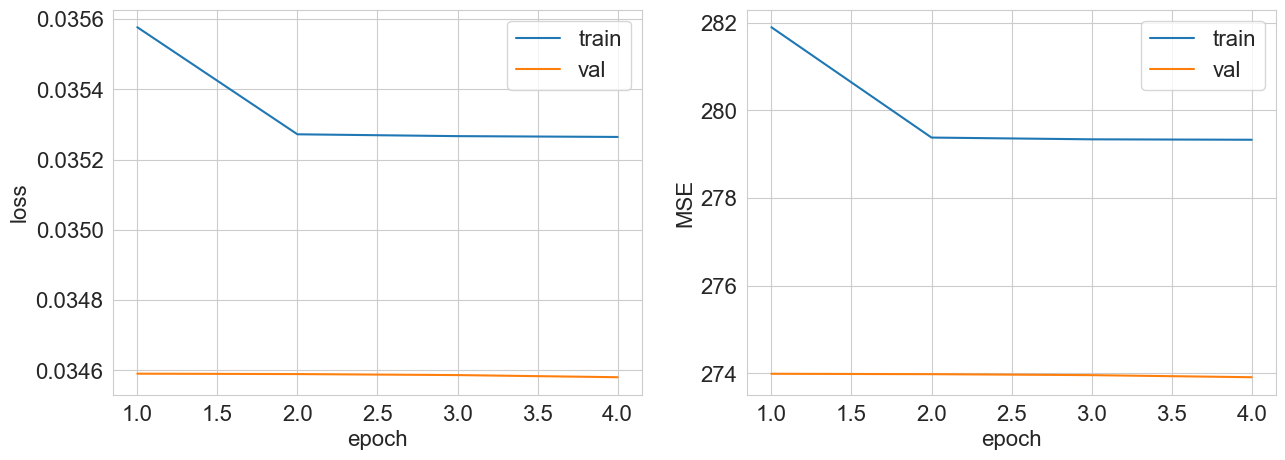

Validation MSE: 273.909


(279.33055824523683, 273.90884087154245)

In [15]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# train data
tensor_X_train = torch.from_numpy(X_train).float() # перевожу numpy массив в torch tensor с float32
tensor_Y_train = torch.from_numpy(y_train - y_train.min()).float()

min_target, max_target = tensor_Y_train.min(), tensor_Y_train.max() # для денормализации
tensor_Y_train = normalize(tensor_Y_train) # + нормализую от 0 до 1

train_tensor_dataset = TensorDataset(
    tensor_X_train,
    tensor_Y_train.reshape(-1, 1)
    )

train_loader = DataLoader(train_tensor_dataset, batch_size= 64, shuffle=True, num_workers= 4, drop_last= True)

# validate data
tensor_X_val = torch.from_numpy(X_val).float()
tensor_Y_val = normalize(torch.from_numpy(y_val - y_train.min()).float())

val_tensor_dataset = TensorDataset(
    tensor_X_val,
    tensor_Y_val.reshape(-1, 1)
    )

val_loader = DataLoader(val_tensor_dataset, batch_size= 64, shuffle= False, num_workers= 4, drop_last= True)

class Net(nn.Module):
    def __init__(self, num_hidden= 128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(90, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)
criterion = nn.MSELoss()
metric = lambda y_true, y_pred, : torch.mean(denormalize(y_pred[:, 0] - y_true, min_target, max_target) ** 2)

train_and_validate(net, optimizer, criterion, metric, train_loader, val_loader, 4, device, verbose=True)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** С нормализацией таргета ошибка снижается более охотно, но заметил что результат сильно различается от запуска к запуску, следует найти лучшие значения при инициализации параметров запуска и явно их объявить. 

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

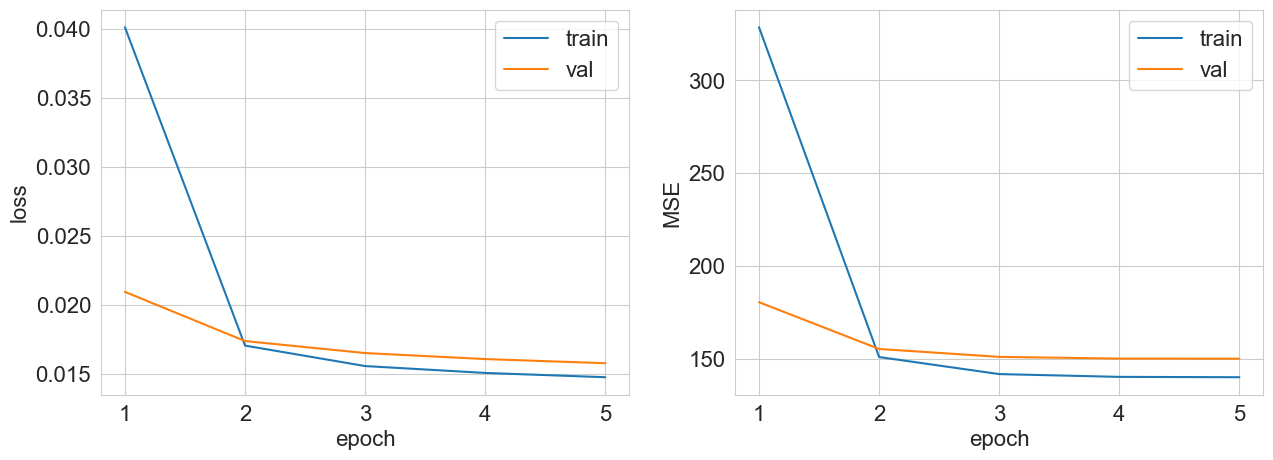

Validation MSE: 150.036


(140.05247159121842, 150.03557327524592)

In [16]:
from sklearn.preprocessing import StandardScaler

# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
scaller = StandardScaler()

X_train_scaller = scaller.fit_transform(X_train) # скалирование train данных
X_val_scaller = scaller.transform(X_val) # скалирование validate данных

tensor_X_train = torch.from_numpy(X_train_scaller).float() # перевожу train скалированные данные в torch.tensor с float32 
tensor_X_val = torch.from_numpy(X_val_scaller).float()# validate скалированные данные в torch.tensor с float32 

train_tensor_dataset_scaller = TensorDataset(
    tensor_X_train,
    tensor_Y_train.reshape(-1, 1) # беру из прошлого преобразования
    )

val_tensor_dataset_scaller = TensorDataset(
    tensor_X_val,
    tensor_Y_val.reshape(-1, 1) # также из прошлого преобразования
    )

train_loader_scaller = DataLoader(train_tensor_dataset_scaller, batch_size= 64, shuffle= True, num_workers= 4, drop_last= True)
val_loader_scaller = DataLoader(val_tensor_dataset_scaller, batch_size= 64, shuffle= False, num_workers= 4, drop_last= True)

class Net(nn.Module):
    def __init__(self, num_hidden= 128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(90, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)
criterion = nn.MSELoss()
metric = lambda y_true, y_pred, : torch.mean(denormalize(y_pred[:, 0] - y_true, min_target, max_target) ** 2)

train_and_validate(
    net, 
    optimizer, 
    criterion, 
    metric, 
    train_loader_scaller, 
    val_loader_scaller, 
    5, 
    device, 
    verbose= True
    ) 

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества. В заданиях 2.1-2.3 **запускайте эксперименты несколько раз (4-5)** с одинаковыми значениями гиперпараметров обучения, но с разными случайными инициализациями сети (достаточно просто прогнать код с инициализацией модели и ее обучением в цикле: каждый вызов конструктора инициализирует модель случайно). Для сравнения качества разных экспериментов **отрисовывайте ящики с усами (boxplot)** по этим нескольким запускам.

Задание 2.4 требует перебора гиперпараметров, в нем запускайте эксперимент по одному разу для каждого рассмотренного значения, чтобы сэкономить время.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

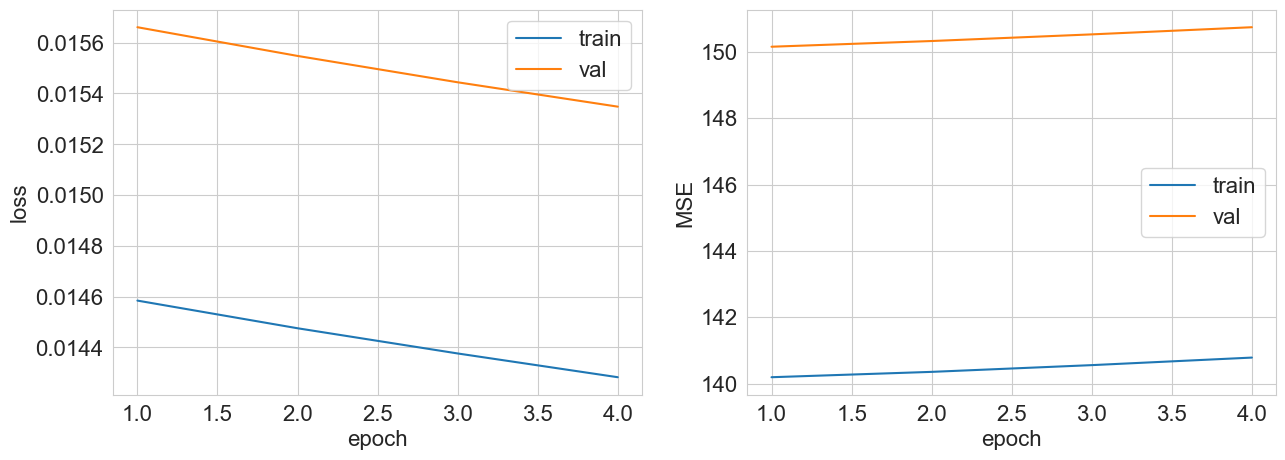

Validation MSE: 150.742


(140.782016074895, 150.74212640104636)

In [17]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# SGD + momentum в качестве оптимизатора
optimizer = torch.optim.SGD(net.parameters(), lr=1e-4, momentum= 0.8)
train_and_validate(
    net, 
    optimizer, 
    criterion, 
    metric, 
    train_loader_scaller, 
    val_loader_scaller, 
    4, 
    device, 
    verbose=True
    ) 

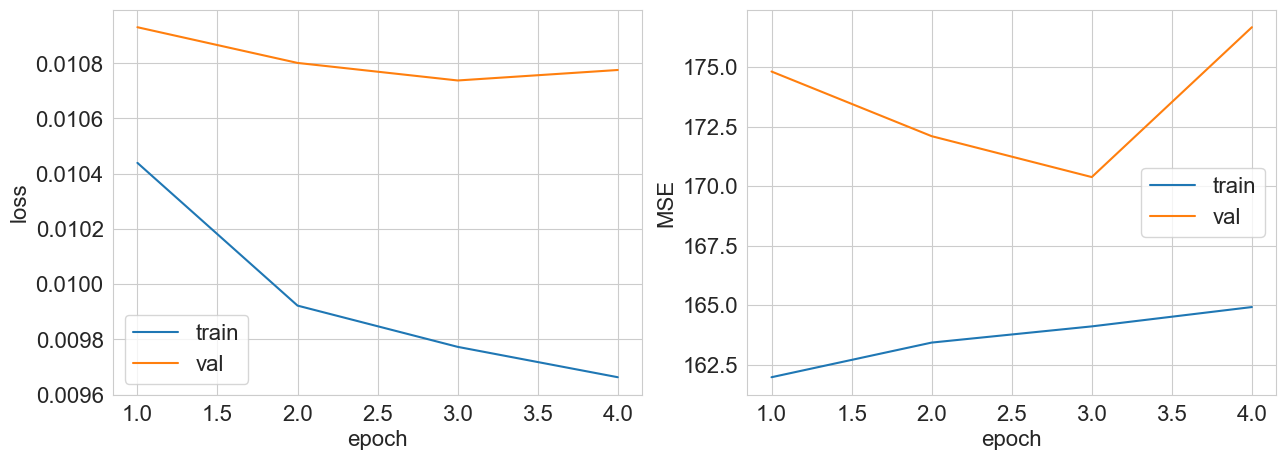

Validation MSE: 176.678


(164.91925313682057, 176.67750696318868)

In [18]:
# Adam
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
train_and_validate(
    net, 
    optimizer, 
    criterion, 
    metric, 
    train_loader_scaller, 
    val_loader_scaller, 
    4, 
    device, 
    verbose=True
    ) 

__Ответ__: После нескольких экспериментов я увидел, что применение SGD + momentum дает более качественный результат. В дальнейшем буду использовать его. Еще выявился один факт - от запуска к запуску результаты обучения имеют значительную разницу, что дополнительно подтверждает необходимость и важность инициализации параметров модели. 

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

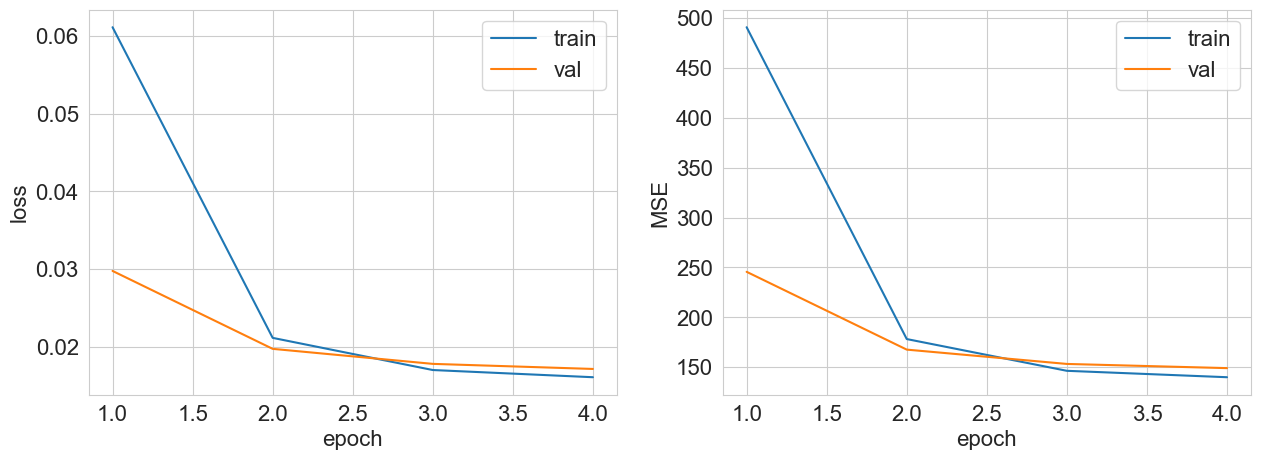

Validation MSE: 149.011


(139.89158799955305, 149.01134175667127)

In [19]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
class Net(nn.Module):
    def __init__(self, num_hidden= 256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(90, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-4, momentum= 0.8)
criterion = nn.MSELoss()
metric = lambda y_true, y_pred, : torch.mean(denormalize(y_pred[:, 0] - y_true, min_target, max_target) ** 2)

train_and_validate(
    net, 
    optimizer, 
    criterion, 
    metric, 
    train_loader_scaller, 
    val_loader_scaller, 
    4, 
    device, 
    verbose=True
    ) 

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты. 

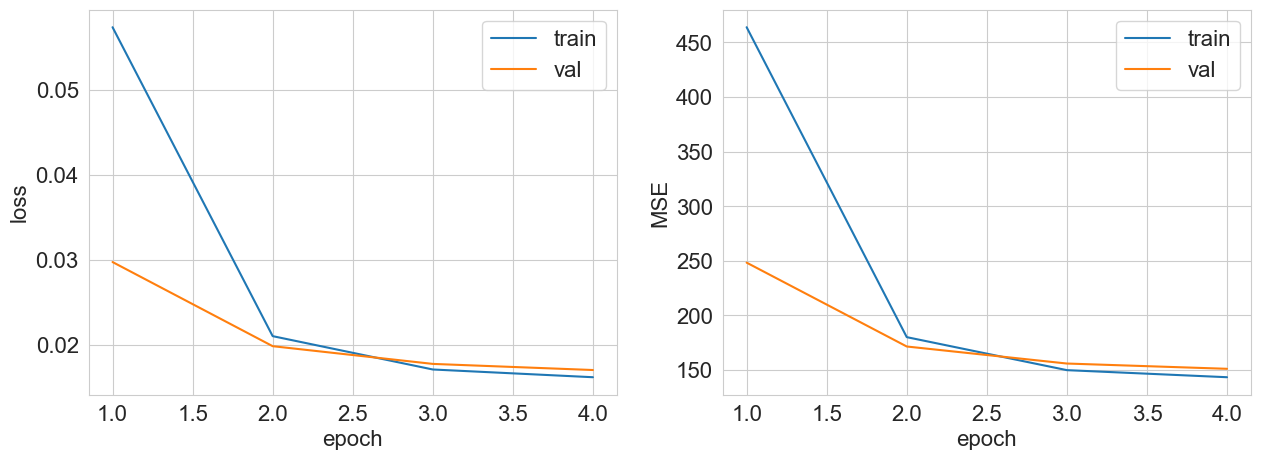

Validation MSE: 151.179


(143.46832379466704, 151.1787626929779)

In [20]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

class Net(nn.Module):
    def __init__(self, num_hidden= 256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(90, num_hidden),
            nn.Dropout(p= 0.2),
            nn.ReLU(),
            nn.Linear(num_hidden, num_hidden),
            nn.Dropout(p= 0.2),
            nn.ReLU(),
            nn.Linear(num_hidden, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-4, momentum= 0.8)
criterion = nn.MSELoss()
metric = lambda y_true, y_pred, : torch.mean(denormalize(y_pred[:, 0] - y_true, min_target, max_target) ** 2)

train_and_validate(
    net, 
    optimizer, 
    criterion, 
    metric, 
    train_loader_scaller, 
    val_loader_scaller, 
    4, 
    device, 
    verbose=True
    ) 

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [21]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# подбор для lr
net = Net().to(device)
criterion = nn.MSELoss()
metric = lambda y_true, y_pred, : torch.mean(denormalize(y_pred[:, 0] - y_true, min_target, max_target) ** 2)
best_val = np.inf
best_lr = 0

for lr in tqdm([1e-3, 1e-4, 1e-5]):
    optimizer = torch.optim.SGD(net.parameters(), lr= lr, momentum= 0.8)
    _, mse_val = train_and_validate(net, optimizer, criterion, metric, train_loader_scaller, val_loader_scaller, 4, device, verbose= False) 
    print(f'MSE error: {mse_val} for lr: {lr}')
    if mse_val < best_val:
        best_val = mse_val
        best_lr = lr

print(f'Best learning rate: {best_lr}')

print()
print('---------------')
print()

# подбор weight_decay
net = Net().to(device)
criterion = nn.MSELoss()
metric = lambda y_true, y_pred, : torch.mean(denormalize(y_pred[:, 0] - y_true, min_target, max_target) ** 2)
best_val = np.inf
best_wd = 0

for w_d in tqdm([0, 1e-6, 1e-4]):
    optimizer = torch.optim.SGD(net.parameters(), lr= best_lr, momentum= 0.8, weight_decay= w_d)
    _, mse_val = train_and_validate(net, optimizer, criterion, metric, train_loader_scaller, val_loader_scaller, 4, device, verbose= False) 
    print(f'MSE error: {mse_val} for weight_decay: {w_d}')
    if mse_val < best_val:
        best_val = mse_val
        best_wd = w_d
print(f'Best learning rate: {best_wd}')

 33%|███▎      | 1/3 [00:57<01:55, 57.69s/it]

MSE error: 151.09191482311653 for lr: 0.001


 67%|██████▋   | 2/3 [01:54<00:57, 57.15s/it]

MSE error: 151.57273139398148 for lr: 0.0001


100%|██████████| 3/3 [02:51<00:00, 57.20s/it]


MSE error: 151.62706864249898 for lr: 1e-05
Best learning rate: 0.001

---------------



 33%|███▎      | 1/3 [00:57<01:55, 57.71s/it]

MSE error: 151.05534412551776 for weight_decay: 0


 67%|██████▋   | 2/3 [01:56<00:58, 58.35s/it]

MSE error: 155.95080388152542 for weight_decay: 1e-06


100%|██████████| 3/3 [02:55<00:00, 58.57s/it]

MSE error: 158.85653478044924 for weight_decay: 0.0001
Best learning rate: 0


Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

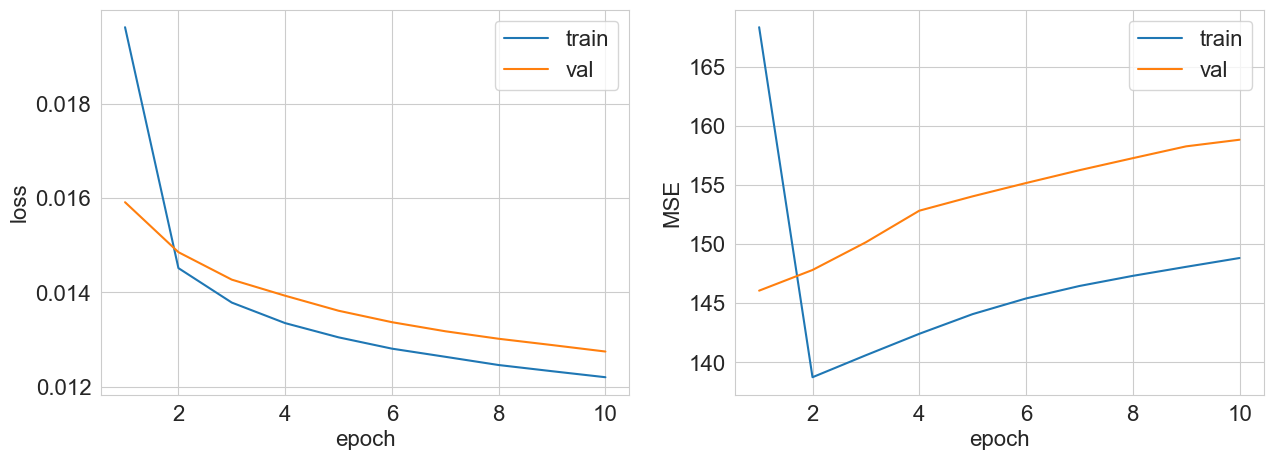

Validation MSE: 158.821


(148.81678020316184, 158.82138979921663)

In [22]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
scaller = StandardScaler()

# заново читаю данные
df = pd.read_csv('data.txt.zip', header= None)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# разбивка данные на train и test
train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

# скалирую train и test данные
X_train_scaller = scaller.fit_transform(X_train) # скалирование train данных
X_test_scaller = scaller.transform(X_test) # скалирование test данных

# преобразую train и test данные в тензор
tensor_X_train = torch.from_numpy(X_train_scaller).float() # перевожу train скалированные данные в torch.tensor с float32 
tensor_X_test = torch.from_numpy(X_test_scaller).float()# validate скалированные данные в torch.tensor с float32 

# преобразую train и test таргет в тензор
tensor_Y_train = torch.from_numpy(y_train - y_train.min()).float() 
tensor_Y_test = torch.from_numpy(y_test - y_train.min()).float()

# для денормализации
min_target, max_target = tensor_Y_train.min(), tensor_Y_train.max()

# + нормализую от 0 до 1
tensor_Y_train = normalize(tensor_Y_train)
tensor_Y_test = normalize(tensor_Y_test)

# формирую датасет для обучения
train_tensor_dataset_scaller = TensorDataset(
    tensor_X_train,
    tensor_Y_train.reshape(-1, 1)
    )

# датасет для теста
test_tensor_dataset_scaller = TensorDataset(
    tensor_X_test,
    tensor_Y_test.reshape(-1, 1)
    )

train_loader_scaller = DataLoader(train_tensor_dataset_scaller, batch_size= 64, shuffle= True, num_workers= 4, drop_last= True)
val_loader_scaller = DataLoader(val_tensor_dataset_scaller, batch_size= 64, shuffle= False, num_workers= 4, drop_last= True)

class Net(nn.Module):
    def __init__(self, num_hidden= 256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(90, num_hidden),
            nn.Dropout(p= 0.2),
            nn.ReLU(),
            nn.Linear(num_hidden, num_hidden),
            nn.Dropout(p= 0.2),
            nn.ReLU(),
            nn.Linear(num_hidden, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr= best_lr, momentum= 0.8, weight_decay= best_wd)
criterion = nn.MSELoss()
metric = lambda y_true, y_pred, : torch.mean(denormalize(y_pred[:, 0] - y_true, min_target, max_target) ** 2)


train_and_validate(net, optimizer, criterion, metric, train_loader_scaller, val_loader_scaller, 10, device, verbose= True)